# Traffic Sign Recognition Classifier

In [2]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.utils import shuffle
import glob

%matplotlib inline

tf.__version__

Using TensorFlow backend.


'1.3.0'

## Step 0: Load The Data

In [3]:
# Load pickled data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

## Step 1: Dataset Summary & Exploration

In [4]:
n_train = X_train.shape[0]

n_validation = X_valid.shape[0]

n_test = X_test.shape[0]

image_shape = X_train.shape[1:3]

n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


In [5]:
n_train + n_validation + n_test

51839

In [5]:
signnames = pd.read_csv('signnames.csv')
signname_dic = {row['ClassId']: row['SignName'] for ind, row in signnames.iterrows()}
signname_dic

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

## Exploratory visualization

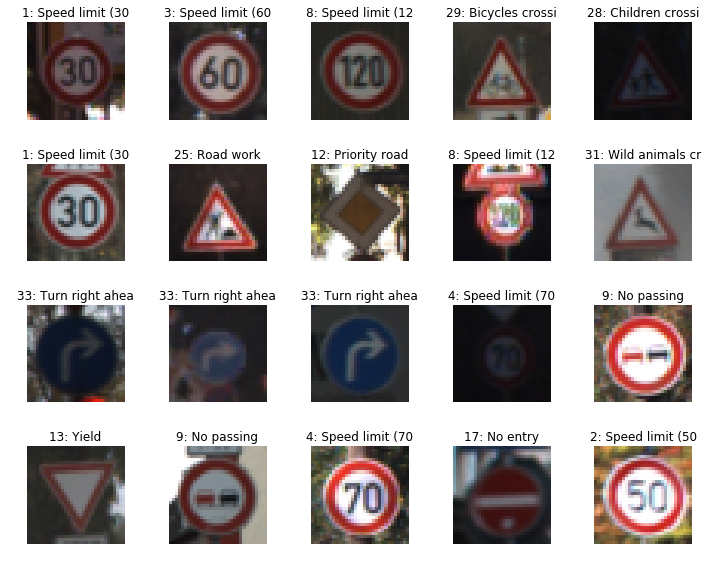

In [46]:
samples = (4,5)
figs, axs = plt.subplots(samples[0], samples[1], figsize=(10, 8))
inds = np.random.choice(n_train, size=(np.prod(samples),), replace=False)
axs = axs.ravel()

for i, ind in enumerate(inds):
    image = X_train[ind]
    axs[i].imshow(image)
    title = '{}: {:.15}'.format(y_train[ind], signname_dic[y_train[ind]])
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()

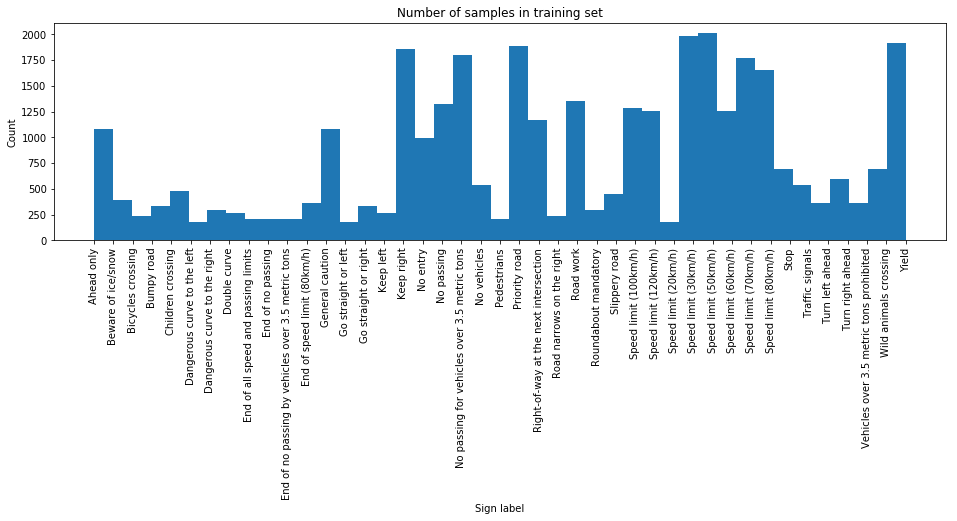

In [7]:
y_train_labels = [signname_dic[id_] for id_ in y_train]
plt.figure(figsize=(16,4))
plt.hist(y_train_labels, bins=n_classes)
plt.title('Number of samples in training set')
plt.xlabel('Sign label')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

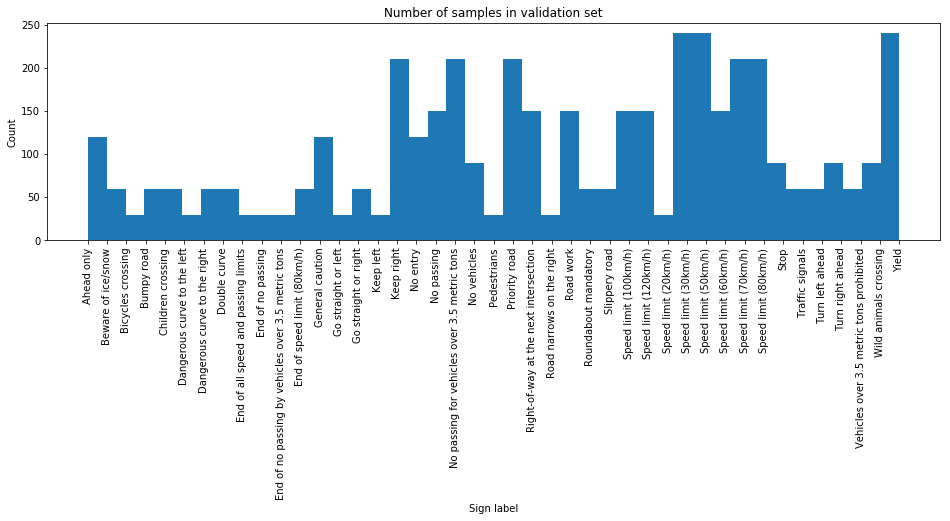

In [9]:
y_valid_labels = [signname_dic[id_] for id_ in y_valid]
plt.figure(figsize=(16,4))
plt.hist(y_valid_labels, bins=n_classes)
plt.title('Number of samples in validation set')
plt.xlabel('Sign label')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

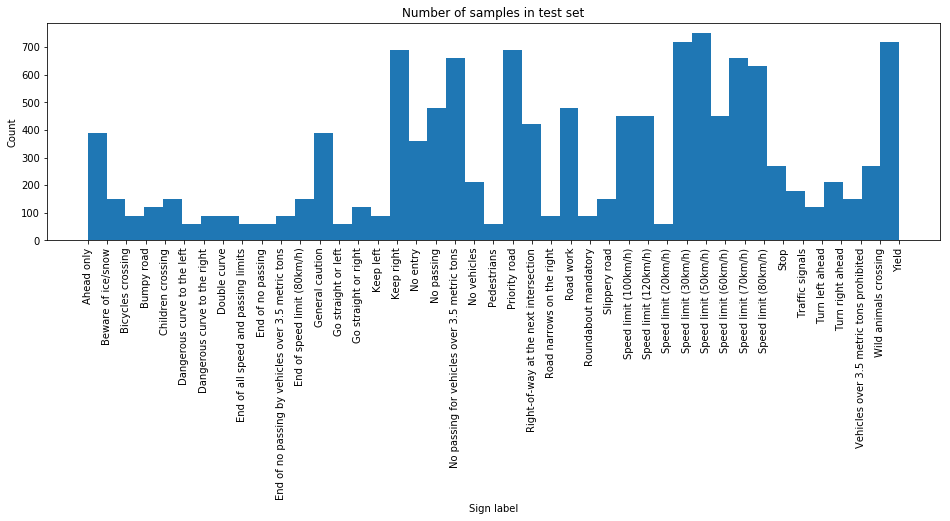

In [10]:
y_test_labels = [signname_dic[id_] for id_ in y_test]
plt.figure(figsize=(16,4))
plt.hist(y_test_labels, bins=n_classes)
plt.title('Number of samples in test set')
plt.xlabel('Sign label')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

## Step 2: Data pipeline

### gray scaling and constrast adjustment

In [8]:
def preprocess(img):
    img = np.sum(img/3, axis = 2, keepdims = True).astype(np.uint8)
    img[:,:,0] = cv2.equalizeHist(img[:,:,0])
    return (img - 128.) / 128.

In [9]:
X_train_processed = np.array([preprocess(X_t) for X_t in X_train])
X_valid_processed = np.array([preprocess(X_v) for X_v in X_valid])
X_test_processed  = np.array([preprocess(X_te) for X_te in X_test])

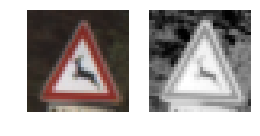

In [10]:
sample_ind = 500

figs, axs = plt.subplots(1, 2, figsize=(4, 4))
axs[0].imshow(X_train[sample_ind])
axs[1].imshow(X_train_processed[sample_ind][:,:,0], cmap='gray')
axs[0].axis('off')
axs[1].axis('off')
plt.show()

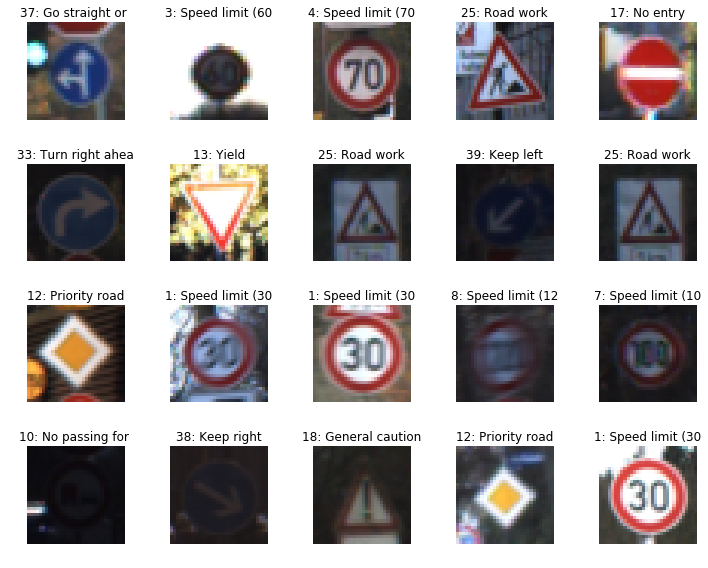

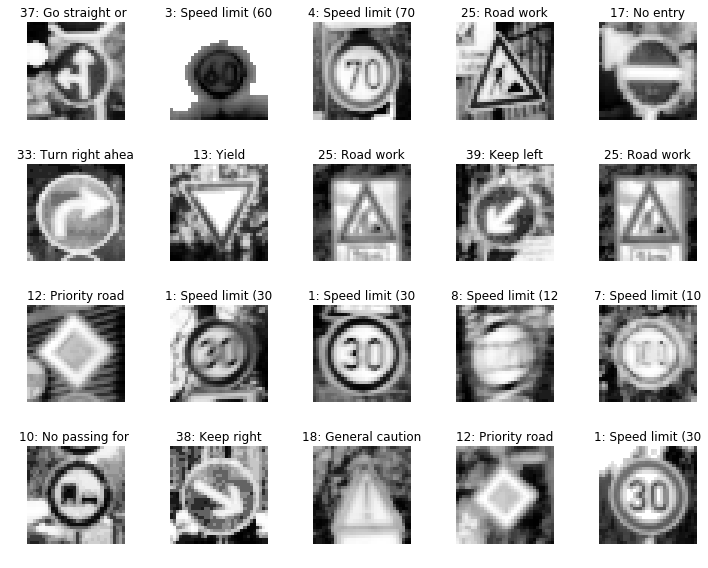

In [11]:
samples = (4,5)
inds = np.random.choice(n_train, size=(np.prod(samples),), replace=False)

figs, axs = plt.subplots(samples[0], samples[1], figsize=(10, 8))
axs = axs.ravel()

for i, ind in enumerate(inds):
    image = X_train[ind]
    axs[i].imshow(image)
    title = '{}: {:.15}'.format(y_train[ind], signname_dic[y_train[ind]])
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()

figs, axs = plt.subplots(samples[0], samples[1], figsize=(10, 8))
axs = axs.ravel()

for i, ind in enumerate(inds):
    image = X_train_processed[ind][:,:,0]
    axs[i].imshow(image, cmap='gray')
    title = '{}: {:.15}'.format(y_train[ind], signname_dic[y_train[ind]])
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()

### Data augmentation

In [12]:
image_datagen = ImageDataGenerator(rotation_range=20,
                                   zoom_range=0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

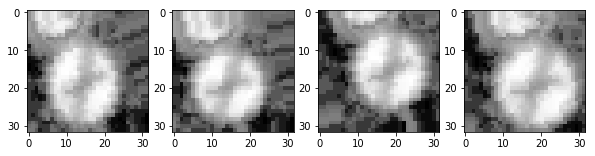

In [14]:
figs, axs = plt.subplots(1, 4, figsize=(10, 4))
for i in range(4):
    for batch_x, batch_y in image_datagen.flow(X_train_processed[:1], y_train[:1], batch_size=1):
        axs[i].imshow(batch_x[0,:,:,0], cmap='gray')
        break
plt.show()

### Model Architecture

In [15]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [21]:
def model(x):    
    mu = 0
    sigma = 0.1
    
    # Layer 1
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # flatten and dropout
    fc0   = flatten(conv2)
    fc0_drop = tf.nn.dropout(fc0, keep_prob)
    
    # Layer 3
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 256), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1   = tf.matmul(fc0_drop, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)
    fc1_drop = tf.nn.dropout(fc1, keep_prob) 

    # Layer 4
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(128))
    fc2    = tf.matmul(fc1_drop, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    

    # Layer 5
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [25]:
rate = 0.001

logits = model(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [26]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Step 3: Training

In [28]:
epochs = 20
iteration_per_epoch = 200
batch_size = 256
dropout_rate = 0.7

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    train_results = []
    validation_results = []
    
    for i in range(epochs):
        count = 0
        for batch_x, batch_y in image_datagen.flow(X_train_processed, y_train, batch_size=batch_size):
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout_rate})
            count += 1
            if count > iteration_per_epoch:
                break
        training_accuracy = evaluate(X_train_processed, y_train)
        validation_accuracy = evaluate(X_valid_processed, y_valid)
        
        print("epoch {}, training acc: {:.3f}, validation acc: {:.3f}".format(i, training_accuracy, validation_accuracy))
        train_results.append(training_accuracy)
        validation_results.append(validation_accuracy)
        
    saver.save(sess, './result')
    print("Model saved")

Training...

epoch 0, training acc: 0.709, validation acc: 0.690
epoch 1, training acc: 0.877, validation acc: 0.824
epoch 2, training acc: 0.925, validation acc: 0.881
epoch 3, training acc: 0.943, validation acc: 0.911
epoch 4, training acc: 0.961, validation acc: 0.926
epoch 5, training acc: 0.962, validation acc: 0.930
epoch 6, training acc: 0.975, validation acc: 0.946
epoch 7, training acc: 0.978, validation acc: 0.954
epoch 8, training acc: 0.982, validation acc: 0.961
epoch 9, training acc: 0.985, validation acc: 0.963
epoch 10, training acc: 0.986, validation acc: 0.967
epoch 11, training acc: 0.987, validation acc: 0.968
epoch 12, training acc: 0.990, validation acc: 0.969
epoch 13, training acc: 0.990, validation acc: 0.976
epoch 14, training acc: 0.990, validation acc: 0.974
epoch 15, training acc: 0.990, validation acc: 0.976
epoch 16, training acc: 0.992, validation acc: 0.971
epoch 17, training acc: 0.992, validation acc: 0.983
epoch 18, training acc: 0.993, validation a

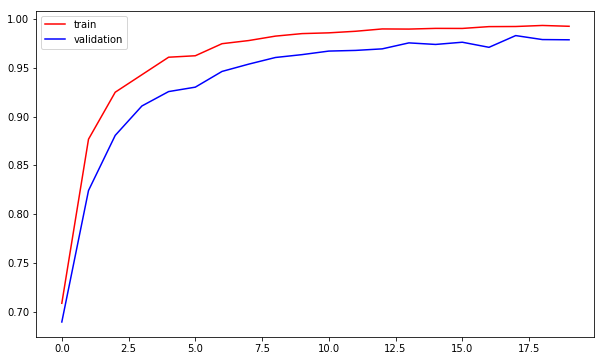

In [30]:
figs, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.plot(train_results, 'r', label='train')
axs.plot(validation_results, 'b', label='validation')
axs.legend()
plt.show()

In [31]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test_processed, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./result


INFO:tensorflow:Restoring parameters from ./result


Test Accuracy = 0.958


## Step 4: Test a Model on New Images

### Load and Output the Images

In [49]:
# images downloaded from:
# https://medium.com/analytics-vidhya/german-traffic-sign-recognition-benchmark-5477ca13daa0

images = glob.glob('../new_data/*.png')

new_X = []

for fname in images:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32, 32))
    new_X.append(preprocess(img))
    
new_X = np.array(new_X)
new_y = np.array([40, 18, 13, 33, 28])

In [50]:
print(new_X.shape, new_y.shape)

(5, 32, 32, 1) (5,)


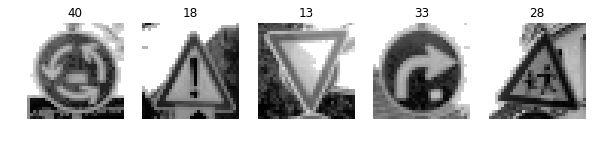

In [52]:
figs, axs = plt.subplots(1, 5, figsize = (10, 6))
for i in range(5):
    axs[i].imshow(new_X[i, :,:, 0], cmap = 'gray')
    axs[i].axis('off')
    axs[i].set_title(new_y[i])

### Predict the Sign Type for Each Image

In [58]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(new_X, new_y)
    top5_prob = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k = 5), feed_dict={x: new_X, keep_prob: 1.0})
    
print('test accuracy on new data = {:.3f}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./result


INFO:tensorflow:Restoring parameters from ./result


test accuracy on new data = 1.000


In [61]:
top5_prob.values.shape

(5, 5)

### Analyze Performance

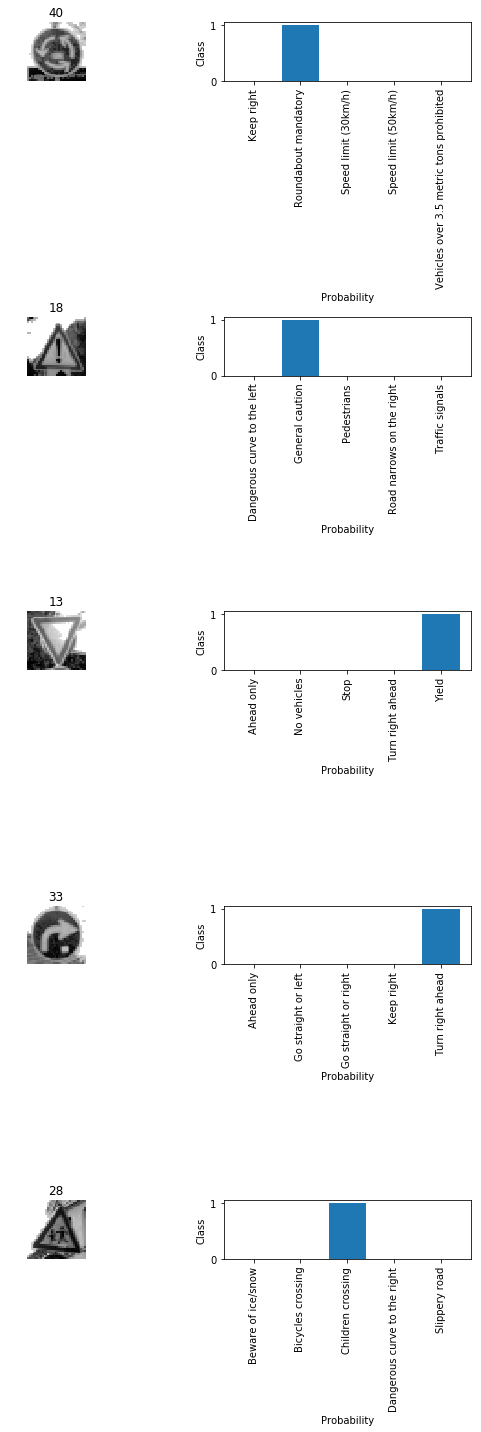

In [77]:
plt.figure(figsize = (8, 20))
for i in range(5):
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(new_X[i,:, :, 0], cmap = 'gray') 
    plt.axis('off')
    plt.subplot(5, 2, 2*i+2)
    signs = [signname_dic[id_] for id_ in top5_prob.indices[i]]
    plt.bar(signs, top5_prob.values[i, :])
    plt.ylabel("Class")
    plt.xlabel("Probability")
    plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()